# How to Use plots and jkf_stats

Lets start with stats, it's simpler. We select a jackknife (.jkf) which is outputted from hera_pspec.jackknife.jackknife() when called.

In [1]:
import hera_stats as hs
import numpy as np
import matplotlib.pyplot as plt

/users/drocha/Python/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Initialize stats object
filepath = "../hera_stats/data/small.spl_ants.Nj40.2018-06-05.21_33_19.jkf"
js = hs.jkf_stats(filepath)

# Show some information about the file
print js.data

<hera_stats.utils.jkfdata instance at 0x7f468f7a14d0>

Jackknife Type: 		spl_ants 
Number of Jackknife Runs: 	40 
Delay Range (ns): 		[-5120, 5017] 
Delay Modes: 			100 
Number of Times: 		180 
Spectral Width Ranges: 		[(600, 700)]


In [3]:
# We can also look directly at the data
print np.array(js.data.spectra).shape

# The shape is (n_jackknives, 2, n_delays)

(40, 2, 100)


In [4]:
# We can run a ks-test using the method:
print js.kstest(norm=(0,1))

# The output is the amount of delay modes that fail the ks test for normality (expect at least 0.1)

0.23


In [5]:
# We can also look at the anderson-darling test
_ = js.anderson(showmore=True)

# This shows us how gaussian our data is. For a gaussian, we expect the failure rate to match
# the significance level. Higher, and the sample is non-gaussian

Samples: 100
Significance level: 15.0 	Observed                         Failure Rate: 19.0
Significance level: 10.0 	Observed                         Failure Rate: 15.0
Significance level: 5.0 	Observed                         Failure Rate: 7.0
Significance level: 2.5 	Observed                         Failure Rate: 6.0
Significance level: 1.0 	Observed                         Failure Rate: 3.0


It appears that the data is not exactly gaussian. To get a better look, we need to use hera_stats.plots.

In [6]:
pl = hs.plots()
pl.load_file(filepath)

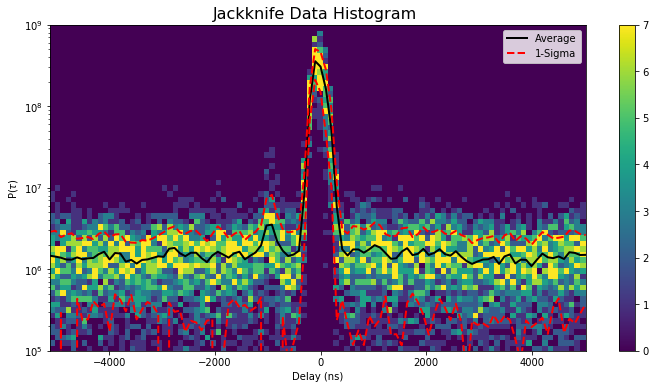

In [7]:
# Let's first look at the distribution of the data. First, the raw data.
ybins = 10**np.linspace(5,9,60)
pl.hist_2d(plottype="raw",ybins=ybins)

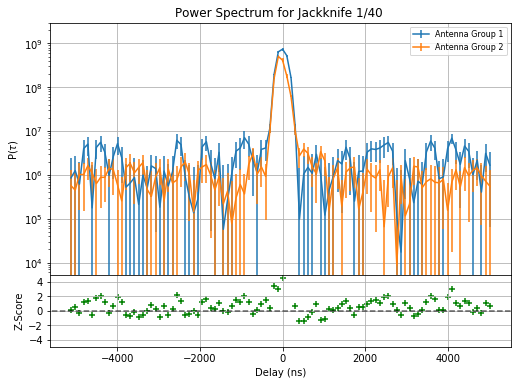

In [8]:
# Now, let's normalize using the errorbars. We can calculate a Z-score using the
# sum of variances of two jackknives

# For example, the zscores are at the botom of this graph
pl.plot_spectra_errs()

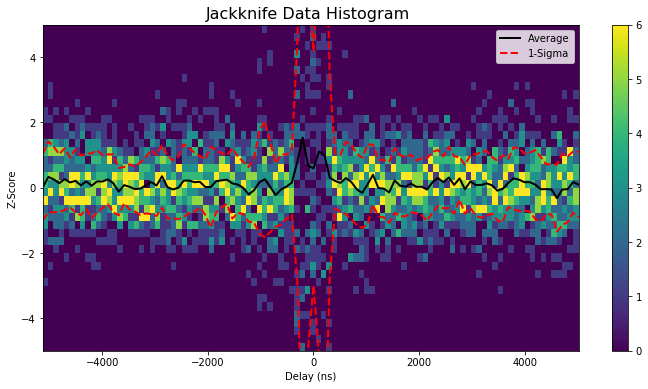

In [9]:
# Now back to the 2d histogram
pl.hist_2d(plottype="varsum")

(-0.4, 2)

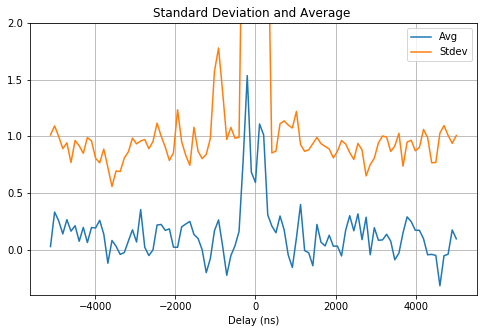

In [10]:
# We can also just look at the average and standard deviation
pl.plot_av_std()
plt.ylim(-0.4,2)

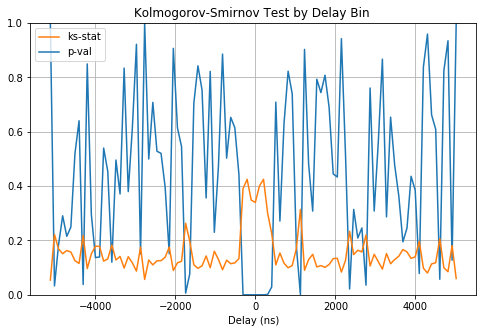

In [11]:
# Finally, a ks test by delay mode
pl.plot_kstest(norm=(0,1))

From this, we see that the spectrum is very much not a (0,1) gaussian in the center, but at the wings, is doesn't look too bad